In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("11-exercise-pids2023.ipynb")

# Exercise sheet 11
**Hello everyone!**

**Points: 15**

Topics of this exercise sheet are:
* Correlation and Regression

Please let us know if you have questions or problems! <br>
Contact us during the exercise session, on [Piazza](https://piazza.com/class/leibdr4lk8n3w4), or [via email](https://sada.dmi.unibas.ch/en/teaching/pids23).

Please submit this exercise sheet on **GRADESCOPE**.
Naming conventions:
* Name of notebook: "11-exercise-pids2023.ipynb"

Your notebook will be automatically graded using gradescope. To get graded, you need to upload the file *11-exercise-pids2023.ipynb* to gradescope. If you are using JupyterHub, make sure you have saved the current notebook, then you can download this file by following: *File*->*Download* and save the file on you computer.

The sheet is released before the exercise session on Tuesday. You have until the next exercise session on Tuesday to submit this sheet. Most of the questions of the exercise sheet can be handle during the session.

**Handout date**: 16.05.2023 <br>
**Submission date**: 23.05.2023 before 16:00 <br>


### Please name the variables as suggested! Be careful with the type! Otherwise the grading system will fail you!



In [2]:
import matplotlib.pyplot as plt
import numpy as np
from nose.tools import assert_is_instance, assert_equal, assert_almost_equal, assert_true

In this exercise, we do a simple regression task using the correlation coefficient as discussed in the last lecture.
At first, let's create the dataset:

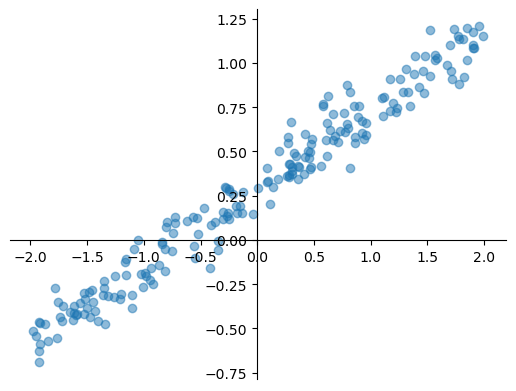

In [3]:
def perturbed_line_data(N):
    np.random.seed(0)
    x = np.random.uniform(low=-2, high=+2, size=N)
    n = np.random.randn(N) * 0.1
    a = np.random.rand(1)
    b = np.random.rand(1)
    y = (b + a * x) + n
    
    return x, y

N = 200 # The number of samples
x, y = perturbed_line_data(N)

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 1a (6 points)
Let $(x,y)$ denote the points given by the function *perturbed_line_data*.
Now we would like to predict the corresponding $\hat{y}$ for a given $x_0$. As discussed in the last lecture, we can make a linear estimator as follows:
$$
\hat{y} = \mu_y +  \rho ( \dfrac{x_0- \mu_x}{\sigma_x} ) \sigma_y
$$
In this section, we want to implement this linear estimator for the given dataset. So at first, calculate the correlation coefficient $\rho$ and store it in variable "rho"; use this to calculate $\hat{y}$ for all datapoint x and store it in variable "y_hat".

Name your variables "\mu_x", "\mu_y", "\rho", "\sigma_x", "\sigma_y" and "y_hat".

Hint: All you need is Numpy!


Correlation coefficient: 0.982


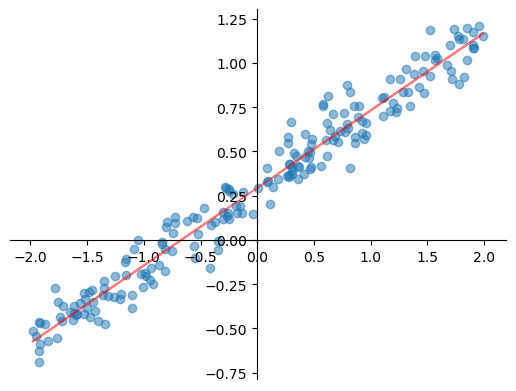

In [4]:
N = 200
x, y = perturbed_line_data(N)

rho = np.corrcoef(x, y)[0][1]
mu_x = np.mean(x)
mu_y = np.mean(y)
sigma_x = np.std(x)
sigma_y = np.std(y)
y_hat = mu_y + rho * (x - mu_x)/sigma_x * sigma_y

print('Correlation coefficient: {:0.3f}'.format(rho))
ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.plot(x, y_hat, alpha=0.5 , color = 'r')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [5]:
grader.check("Question 1a")

Question 1a results: All test cases passed!

Why is this estimator called "linear"? Can you explain it from the formula and the plot?

Because *perturbed_line_data* uses a linear function to fit the randomly generated values (ax + b + n).

### 1b (2 points)
Since we will use this linear estimator in the next parts, it is more convenient to make it a function that takes the samples $x$ and $y$ and the query point(s) $x_0$ as input and returns the predictions $\hat{y}$ and correlation coefficient $\rho$.
Make sure that the function can take a vector $x_0$ as input.


In [6]:
N0 = 100
x0 = np.linspace(-2,2,N0)

def linear_regressor(x, y, x0):
    rho = np.corrcoef(x, y)[0][1]
    mu_x = np.mean(x)
    mu_y = np.mean(y)
    sigma_x = np.std(x)
    sigma_y = np.std(y)
    y_hat = mu_y + rho * (x0 - mu_x)/sigma_x * sigma_y
    return y_hat, rho  

y_hat, rho = linear_regressor(x,y,x0)
print('Correlation coefficient: {:0.3f}'.format(rho))

Correlation coefficient: 0.982


In [7]:
grader.check("Question 1b")

Question 1b results: All test cases passed!

### 1c (5 points)
SciPy provides a linear regression function, called linregress, that similarly to our function returns the correlation coefficient. Please use the linregress function to calculate the regression line's slope, intercept, and correlation coefficient and store them respectively in variables "slope", "intercept" and "rho_scipy". 

Correlation coefficient: 0.982


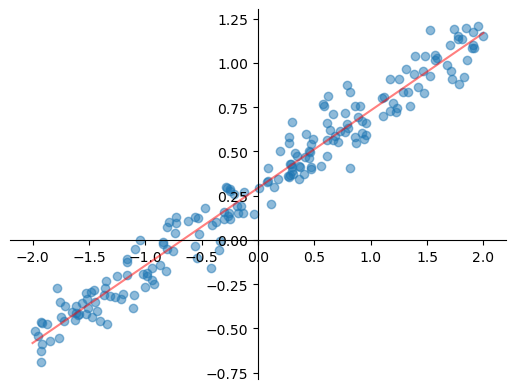

In [8]:
from scipy.stats import linregress
N = 200
x,y = perturbed_line_data(N)

slope, intercept, rho_scipy, *_ = linregress(x, y)

N0 = 100
x0 = np.linspace(-2,2,N0)
print('Correlation coefficient: {:0.3f}'.format(rho_scipy))
ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.plot(x0, slope * x0 + intercept, alpha=0.5 , color = 'r')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [9]:
grader.check("Question 1c")

Question 1c results: All test cases passed!

## Non-linear dataset

We want to assess the performance of our linear regression over a more complicated dataset. At first, let's create it:

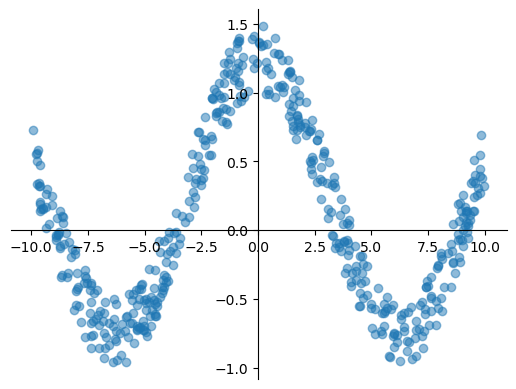

In [10]:
def perturbed_cos_data(N):
    np.random.seed(0)
    x = np.random.uniform(low = -10 , high = 10 , size = N)
    n = np.random.rand(N) * 0.5
    y = np.cos(0.5*x) + n
    
    return x, y

N = 500 # The number of samples
x,y = perturbed_cos_data(N)

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

### 2a (2 points)
Now let's calculate $\hat{y}$ and correlation coefficient from the linear regressor function over this dataset.
Compute the prediction $\hat{y}$ over 200 points uniformly spaced between -10 and 10.

Name the resulting variables "y_hat_cos" and "rho_cos". Name the 200 sampling points "x0".

Correlation coefficient: 0.049


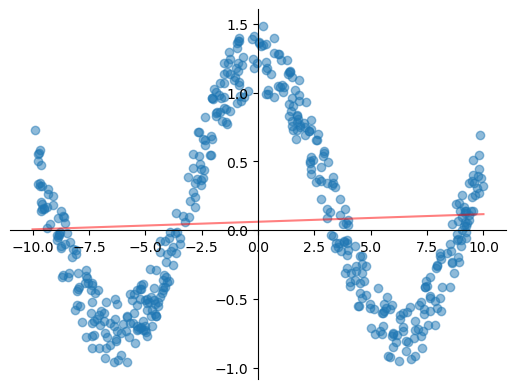

In [11]:
N = 500 # The number of samples
x,y = perturbed_cos_data(N)

N0 = 200
x0 = np.linspace(-10, 10, N0)

y_hat_cos, rho_cos = linear_regressor(x,y,x0)

print('Correlation coefficient: {:0.3f}'.format(rho_cos))
ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5)
ax.plot(x0, y_hat_cos, alpha=0.5 , color = 'r')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

In [12]:
grader.check("Question 2a")

Question 2a results: All test cases passed!

Is this a reasonable estimation? How can we design a better estimator?

Can you compare $\rho$ for these two datasets? Which one is greater, and what does it mean to you?

The first $\rho$ is good because it fits the linear data, the second $\rho$ is still a linear fit but to data distributed around a $cos$ function.

## 3) (Bonus) Non-linear regression (2 points)

We saw with the previous example the limit of the linear model to predict a dateset. When the dataset follow a more complicated trend, we can try to find a more complicated function that reproduce this trend. *Scipy* provide a function called *curve_fit* that can help you with that. 

Using this function, try your best to approximate the dataset given by *perturbed_cos_data*.
Name the function to fit "func" and the output of the *curve_fit* function "popt" and "pcov" (as in the documentation).

In [13]:
from scipy.optimize import curve_fit

N = 500 # The number of samples
x,y = perturbed_cos_data(N)

def func(x, n):
    return np.cos(0.5*x) + n

popt, pcov, *_ = curve_fit(func, x, y)

In [14]:
grader.check("Question 3")

Question 3 results: All test cases passed!

We now display the estimation.

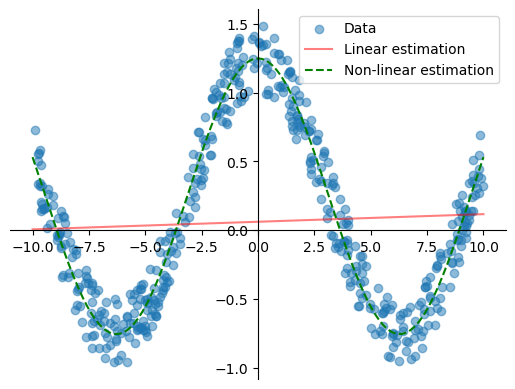

In [15]:
N0 = 200
x0 = np.linspace(-10,10,N0)

ax = plt.subplot(111)
ax.scatter(x, y, alpha=0.5,label='Data')
ax.plot(x0, y_hat_cos, alpha=0.5 , color = 'r',label='Linear estimation')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.plot(x0, func(x0, *popt), 'g--',label='Non-linear estimation')
plt.legend()

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [16]:
grader.check_all()

Question 1a results:
    Question 1a - 1 result:
        ❌ Test case failed
        Trying:
            assert_equal(len(y_hat), N)
        Expecting nothing
        **********************************************************************
        Line 1, in Question 1a 0
        Failed example:
            assert_equal(len(y_hat), N)
        Exception raised:
            Traceback (most recent call last):
              File "/home/ruben/anaconda3/envs/data_science/lib/python3.11/doctest.py", line 1351, in __run
                exec(compile(example.source, filename, "single",
              File "<doctest Question 1a 0[0]>", line 1, in <module>
                assert_equal(len(y_hat), N)
              File "/home/ruben/anaconda3/envs/data_science/lib/python3.11/unittest/case.py", line 873, in assertEqual
                assertion_func(first, second, msg=msg)
              File "/home/ruben/anaconda3/envs/data_science/lib/python3.11/unittest/case.py", line 866, in _baseAssertEqual
         